# Analysis of data

In [4]:
from BronchoTrack.data import datasets
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

bronchoset = datasets.BronchoDataset("data/cleaned/train", "/mnt/DADES/datasetcalibracio/", length=2)

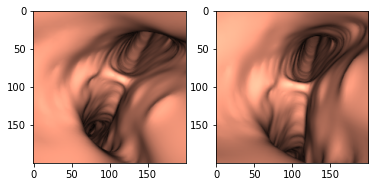

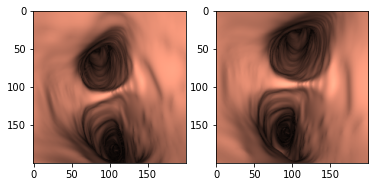

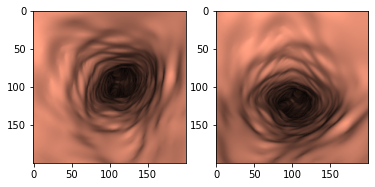

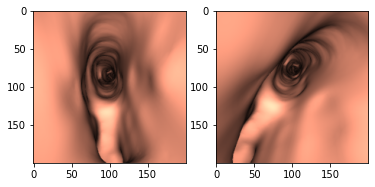

In [6]:
for i, sample in enumerate(bronchoset):
    #print(sample["pos_labels"], sample["rot_labels"])
    fig, ax = plt.subplots(1,2)
    img_A = np.transpose(sample["images"][0])
    img_B = np.transpose(sample["images"][1])
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)
    
    if i > 2:
        break

In [3]:
batch = next(iter(bronchoset))

In [4]:
batch["pos_labels"], batch["rot_labels"]

(tensor([[ 0.1047,  0.9624, -1.6967],
         [ 0.1155, -0.2850, -1.3186],
         [ 0.1196, -0.1552, -1.6092],
         [ 0.1210, -0.1148, -1.2620],
         [ 0.1210,  0.8944,  0.9085],
         [ 0.1210,  1.1315,  0.1293],
         [ 0.1210,  0.5548,  0.6256],
         [ 0.1440, -0.0187, -1.4163],
         [ 0.6435,  0.7727, -0.9380],
         [ 0.4101,  1.0450, -1.5501],
         [-0.1410,  1.1219, -0.7785],
         [-0.3405,  1.1315, -1.0872],
         [ 0.0097,  1.1315,  1.3226],
         [ 0.3856,  0.5068,  0.0136],
         [-0.0053,  0.0902,  0.1036]]),
 tensor([[ 0.2489,  0.0543,  0.0029],
         [ 0.1635,  0.4252,  0.0029],
         [ 0.1538,  0.2321,  0.0029],
         [ 0.1557, -0.1548,  0.0029],
         [ 0.1817, -0.3975,  0.0029],
         [ 0.2130, -0.0296,  0.0029],
         [ 0.2028,  0.1930,  0.0029],
         [ 0.2110, -0.0431,  0.0029],
         [ 0.2257, -1.5032,  0.0029],
         [ 0.2454, -2.2667,  0.0029],
         [ 0.3018, -2.0949,  0.0029],
         [

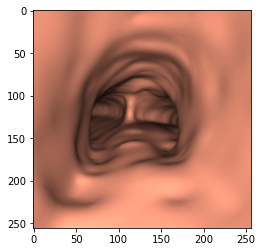

In [5]:
plt.imshow(np.round((np.transpose(batch["images"][0], (1, 2, 0))*bronchoset.image_std + bronchoset.image_mean)*255).numpy().astype(np.uint8))

In [6]:
for sample in bronchoset:
    print(sample["images"].shape, sample["pos_labels"].shape, sample["rot_labels"].shape)
    break

torch.Size([16, 3, 256, 256]) torch.Size([15, 3]) torch.Size([15, 3])


In [7]:
from BronchoTrack.trainer import BronchoModel
import torch

trainmodel = BronchoModel(pred_folder="./data/cleaned/preds", lr=1e-4, model="doublelatetemporal", loss="mse")

In [11]:
torch.round(trainmodel._unscale(torch.cat([sample["pos_labels"], sample["rot_labels"]], dim=-1)))

tensor([[ 0., -0., -2., -0., -0.,  0.],
        [ 0., -0., -2., -1.,  1.,  0.],
        [ 0., -0., -2., -0.,  1., -0.],
        [ 0., -0., -1.,  0., -1.,  0.],
        [ 0., -0., -2.,  0., -1.,  0.],
        [ 0., -0., -1., -1., -1., -0.],
        [ 0., -0., -2., -1., -0.,  0.],
        [ 0., -0., -2.,  1., -0., -0.],
        [ 0., -0., -1.,  0., -1.,  0.],
        [ 0., -0., -2.,  1., -1.,  0.],
        [ 0., -0., -2., -0., -0., -0.],
        [ 0., -0., -2., -1., -0.,  0.],
        [ 0., -0., -2.,  1.,  0.,  0.],
        [-0., -0., -2.,  1.,  0.,  0.],
        [-0., -0., -2., -1.,  2., -0.]])